# COMP30760 - An Analysis of the Career Long Domination of the NBA by LeBron James

<font color=red>NAME: </font> Cian Ferriter<br> <font color=red>STUDENT NUMBER: </font> 0000000

## Task 1: Identify one or more suitable web APIs

A single API that was chosen for this assignment was that provided by stats.nba.com , with python functionality documentation found here https://pypi.org/project/nba-api/

#### pre-installation
For my selected API I was lucky enough to discover that it had been wrapped in python which would make my API calls a lot much easier. it was necessary to install this package prior to beginning using the below command

pip install nba_api

## Task 2: Collect data your chosen API(s)


Seeing as my API had python functionality built into it, it made accessing the  required data quite striaghtforward and it mainly involved function calls to the API. A lot of cleaning will be required as the endpoints return huge amounts of data for every player

##### My Main aim with my data collection is to provide comparisons with LeBron James to previous winners of the MVP award from the time that LeBron first entered the league. I also want to analyse the impact that LeBron has on the teams he plays for

In [7]:
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.static import players
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamefinder

So let's start off by trying to find LeBron from the API !!

In [3]:
players.find_players_by_full_name("LeBron")

[{'id': 2544,
  'full_name': 'LeBron James',
  'first_name': 'LeBron',
  'last_name': 'James',
  'is_active': True}]

Now that I've gotten his ID from the API, I can use this to gather his career stats

In [227]:
career = playercareerstats.PlayerCareerStats(player_id='2544')
career = career.get_data_frames()[0]
career

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,2544,2003-04,00,1610612739,CLE,19.0,79,79,3120.0,622,...,0.754,99,333,432,465,130,58,273,149,1654
1,2544,2004-05,00,1610612739,CLE,20.0,80,80,3388.0,795,...,0.750,111,477,588,577,177,52,262,146,2175
2,2544,2005-06,00,1610612739,CLE,21.0,79,79,3361.0,875,...,0.738,75,481,556,521,123,66,260,181,2478
3,2544,2006-07,00,1610612739,CLE,22.0,78,78,3190.0,772,...,0.698,83,443,526,470,125,55,250,171,2132
4,2544,2007-08,00,1610612739,CLE,23.0,75,74,3027.0,794,...,0.712,133,459,592,539,138,81,255,165,2250
5,2544,2008-09,00,1610612739,CLE,24.0,81,81,3054.0,789,...,0.780,106,507,613,587,137,93,241,139,2304
6,2544,2009-10,00,1610612739,CLE,25.0,76,76,2966.0,768,...,0.767,71,483,554,651,125,77,261,119,2258
7,2544,2010-11,00,1610612748,MIA,26.0,79,79,3063.0,758,...,0.759,80,510,590,554,124,50,284,163,2111
8,2544,2011-12,00,1610612748,MIA,27.0,62,62,2326.0,621,...,0.771,94,398,492,387,115,50,213,96,1683
9,2544,2012-13,00,1610612748,MIA,28.0,76,76,2877.0,765,...,0.753,97,513,610,551,129,67,226,110,2036


## Getting Previous Most Valuable Player's (MVP's) Data



Unfortunately, my selecteed API did not contain any endpoints or data relating to the NBA'S Most Valuable player for a given season and no matter how hard I tried I was unable to find an API to provide me with a list of previous Most Valuable Players in the NBA, so I have made my own list and will use my NBA API to extract their stats. I have a list of the winners from 2003-2018.

In [8]:
import pandas as pd
mvps = {
        "2003-04":'Kevin Garnett', 
        "2004-05":'Steve Nash',
        "2005-06":'Steve Nash', 
        "2006-07":'Dirk Nowitzki', 
        "2007-08":'Kobe Bryant',
        "2008-09":'LeBron James',
        "2009-10":'LeBron James',
        "2010-11":'Derrick Rose',
        "2011-12":'LeBron James',
        "2012-13":'LeBron James',
        "2013-14":'Kevin Durant',
        "2014-15":'Stephen Curry',
        "2015-16":'Stephen Curry',
        "2016-17":'Russell Westbrook',
        "2017-18":'James Harden'
}

#API call which retrieve's a players basic info which relates to using them in the API, specifically, their ID.
playerID =[]
for mvp in mvps:
    if mvps[mvp] != "LeBron James":
        playerID += players.find_players_by_full_name(mvps[mvp])
        

In [9]:
print(playerID)

[{'id': 708, 'full_name': 'Kevin Garnett', 'first_name': 'Kevin', 'last_name': 'Garnett', 'is_active': False}, {'id': 959, 'full_name': 'Steve Nash', 'first_name': 'Steve', 'last_name': 'Nash', 'is_active': False}, {'id': 959, 'full_name': 'Steve Nash', 'first_name': 'Steve', 'last_name': 'Nash', 'is_active': False}, {'id': 1717, 'full_name': 'Dirk Nowitzki', 'first_name': 'Dirk', 'last_name': 'Nowitzki', 'is_active': True}, {'id': 977, 'full_name': 'Kobe Bryant', 'first_name': 'Kobe', 'last_name': 'Bryant', 'is_active': False}, {'id': 201565, 'full_name': 'Derrick Rose', 'first_name': 'Derrick', 'last_name': 'Rose', 'is_active': True}, {'id': 201142, 'full_name': 'Kevin Durant', 'first_name': 'Kevin', 'last_name': 'Durant', 'is_active': True}, {'id': 201939, 'full_name': 'Stephen Curry', 'first_name': 'Stephen', 'last_name': 'Curry', 'is_active': True}, {'id': 201939, 'full_name': 'Stephen Curry', 'first_name': 'Stephen', 'last_name': 'Curry', 'is_active': True}, {'id': 201566, 'full_

In [10]:
#creating a set of the player id's so later on when collecting their stats I can have just one copy of that player's stats
# as sets do not allow for duplicate values
s = set()
for mvp in playerID:
    s.add(mvp['id'])
    print(mvp['id'])
    print(mvp['full_name'])
#I now want to make a list of my set to make it easier to iterate through later on
IdList = list(s)

708
Kevin Garnett
959
Steve Nash
959
Steve Nash
1717
Dirk Nowitzki
977
Kobe Bryant
201565
Derrick Rose
201142
Kevin Durant
201939
Stephen Curry
201939
Stephen Curry
201566
Russell Westbrook
201935
James Harden


In [11]:
import pandas as pd

#here I am creating a dictionary of dataframes, each dataframe is value and it's key is the player ID. the API call 
#makes my data frames.
dataframe_collection = {}

for player in IdList:
    dataframe_collection[player] = pd.DataFrame(playercareerstats.PlayerCareerStats(player_id=player).get_data_frames()[0])


I also want to collect LeBron's past team data:

In [ ]:
nba_teams = teams.get_teams()

teams_id = []
for team in nba_teams:
    if(team['abbreviation'] == 'CLE' or team['abbreviation'] == 'MIA' ):
        teams_id.append(team['id'])
teams_id

# Query for every game the Cavs were playing from their foundation.

totalGames = leaguegamefinder.LeagueGameFinder(team_id_nullable=teams_id[0])
# The first DataFrame of those returned is what I want.
cavsgames = totalGames.get_data_frames()[0]

totalGamesMIA = leaguegamefinder.LeagueGameFinder(team_id_nullable=teams_id[1],)
MIA_games = totalGamesMIA.get_data_frames()[0]

## Task 3: Parse the collected data, and store it in an appropriate file format



for the games data I can export it to csv rather easily:

In [ ]:
MIA_games.to_csv("MIA_games.csv")
cavsgames.to_csv("CAVS_games.csv")

the below for loops for the MVP data automatically appends each data frame frome my datafram dictionary into a csv file

In [ ]:
import pandas as pd

career.to_csv("LeBron.csv")

In [12]:
import csv
#creating headings for my csv which I have already made earlier
headings = ["ROW","PLAYER_ID","SEASON_ID","LEAGUE_ID","TEAM_ID","TEAM_ABBREVIATION","PLAYER_AGE","GP","GS","MIN","FGM","FGA","FG_PCT","FG3M","FG3A","FG3_PCT","FTM","FTA","FT_PCT","OREB","DREB","REB","AST","STL","BLK","TOV","PF","PTS"]
with open('MVP.csv', 'a') as f:
        addhead = csv.writer(f)
        addhead.writerow(headings)
        


In [13]:
#using the dictionary I just made I am now adding in my new data by appending it to my csv.
for key in dataframe_collection.keys():
    with open('MVP.csv', 'a') as f:
        (dataframe_collection[key]).to_csv(f, header=False)

## Task 4: Load and represent the data using an appropriate data structure. Apply any pre-processing steps to clean/filter/combine the data

<font color=red>Team Stats</font><br>
For my analysis of the impact LeBron has on teams he plays for I will have to break down the games for the relevant seasons. The core stats I want from each game is: W/L, Points scored, points plus minus

In [41]:
import pandas as pd

fields = ['SEASON_ID', 'MATCHUP', 'GAME_ID', 'WL', 'PTS']
cavs_df = pd.read_csv("CAVS_games.csv", usecols=fields)
mia_df = pd.read_csv("MIA_games.csv", usecols=fields)


cavs0002 = cavs_df.loc[cavs_df['SEASON_ID'].isin(['22000','22001', '22002', '22003'])]
cavs0309 = cavs_df.loc[cavs_df['SEASON_ID'].isin(['22003','22004', '22005', '22006', '22007', '22008', '22009'])]
cavs1013 = cavs_df.loc[cavs_df['SEASON_ID'].isin(['22010','22011', '22012', '22013'])]
mia0709 = mia_df.loc[mia_df['SEASON_ID'].isin(['22007','22008', '22009'])]
mia1013 = mia_df.loc[mia_df['SEASON_ID'].isin(['22010','22011', '22012'])]
mia1013


,SEASON_ID,GAME_ID,MATCHUP,WL,PTS
678,22012,21201220,MIA vs. ORL,W,105
679,22012,21201204,MIA @ CLE,W,96
680,22012,21201194,MIA vs. CHI,W,105
681,22012,21201180,MIA vs. BOS,W,109
682,22012,21201165,MIA @ WAS,W,103
683,22012,21201157,MIA vs. MIL,W,94
684,22012,21201140,MIA vs. PHI,W,106
685,22012,21201126,MIA @ CHA,W,89
686,22012,21201109,MIA vs. NYK,L,90
687,22012,21201098,MIA @ SAS,W,88


##### MVP Comparison Pre-Processing Work
The stats I want to use for comparison are going to be Points, Rebounds,Assists, Steals and Field Goal Percentages.To ensure fair comparisons, I am going to compare LeBron's stats from each individual MVP's stats, using the same season that the title was won. IN the case where a player has >1 MVP award I will take the season in which they first won.

In [15]:
fields =["SEASON_ID", "GP", "FG_PCT", "REB", "AST","STL","PTS"]
LeBron = pd.read_csv("LeBron.csv", usecols = fields)
#remove this season's data as it is not complete
LeBron = LeBron.drop([16], axis=0)
LeBron

,SEASON_ID,GP,FG_PCT,REB,AST,STL,PTS
0,2003-04,79,0.417,432,465,130,1654
1,2004-05,80,0.472,588,577,177,2175
2,2005-06,79,0.480,556,521,123,2478
3,2006-07,78,0.476,526,470,125,2132
4,2007-08,75,0.484,592,539,138,2250
5,2008-09,81,0.489,613,587,137,2304
6,2009-10,76,0.503,554,651,125,2258
7,2010-11,79,0.510,590,554,124,2111
8,2011-12,62,0.531,492,387,115,1683
9,2012-13,76,0.565,610,551,129,2036


In [2]:
import pandas as pd
MVPFields = ["PLAYER_ID", "SEASON_ID", "GP", "FG_PCT", "REB", "AST","STL","PTS"]
MVPdf = pd.read_csv("MVP.csv", usecols=MVPFields)
MVPdf

,PLAYER_ID,SEASON_ID,GP,FG_PCT,REB,AST,STL,PTS
0,708,1995-96,80,0.491,501,145,86,835
1,708,1996-97,77,0.499,618,236,105,1309
2,708,1997-98,82,0.491,786,348,139,1518
3,708,1998-99,47,0.460,489,202,78,977
4,708,1999-00,81,0.497,956,401,120,1857
5,708,2000-01,81,0.477,921,401,111,1784
6,708,2001-02,81,0.470,981,422,96,1714
7,708,2002-03,82,0.502,1102,495,113,1883
8,708,2003-04,82,0.499,1139,409,120,1987
9,708,2004-05,82,0.502,1108,466,121,1817


<font color=red>MVP Core Stats</font>
<br>Here I will construct dataframes for all MVPs. The dataframes will include their stats from the entirity of their careers.

In [3]:
#there are a few players who have since retired: 
#Kobe(2016), Garnett(2016) and Nash(2015) - so I will only specify the rows up until their retirement

#once I get the the dataframe's constructed I want to drop the PLAYER_ID column to make the act of plotting a lot cleaner.
Garnettdf = MVPdf.loc[MVPdf['SEASON_ID'].isin(['2003-04','2004-05','2005-06','2006-07','2007-08','2008-09','2009-10','2010-11','2011-12','2012-13','2013-14','2014-15','2015-16']) & MVPdf['PLAYER_ID'].isin(['708'])]
Garnettdf = Garnettdf.drop(columns = ['PLAYER_ID'])

Nashdf = MVPdf.loc[MVPdf['SEASON_ID'].isin(['2003-04','2004-05','2005-06','2006-07','2007-08','2008-09','2009-10','2010-11','2011-12','2012-13','2013-14','2014-15','2015-16']) & MVPdf['PLAYER_ID'].isin(['959'])]
Nashdf = Nashdf.drop(columns = ['PLAYER_ID'])

Nowitzkidf = MVPdf.loc[ MVPdf['SEASON_ID'].isin(['2003-04','2004-05','2005-06','2006-07','2007-08','2008-09','2009-10','2010-11','2011-12','2012-13','2013-14','2014-15','2015-16','2017-18','2018-19']) &   MVPdf['PLAYER_ID'].isin(['1717'])]
Nowitzkidf = Nowitzkidf.drop(columns = ['PLAYER_ID'])

Bryantdf = MVPdf.loc[MVPdf['SEASON_ID'].isin(['2003-04','2004-05','2005-06','2006-07','2007-08','2008-09','2009-10','2010-11','2011-12','2012-13','2013-14','2014-15','2015-16'])&MVPdf['PLAYER_ID'].isin(['977'])]
Bryantdf = Bryantdf.drop(columns = ['PLAYER_ID'])

Rosedf = MVPdf.loc[MVPdf['PLAYER_ID'].isin(['201565'])]
Rosedf = Rosedf.drop(columns = ['PLAYER_ID'])

Durantdf = MVPdf.loc[MVPdf['PLAYER_ID'].isin(['201142'])]
Durantdf = Durantdf.drop(columns = ['PLAYER_ID'])
Durantdf
Currydf = MVPdf.loc[MVPdf['PLAYER_ID'].isin(['201939'])]
Currydf = Currydf.drop(columns = ['PLAYER_ID'])

Westbrookdf = MVPdf.loc[MVPdf['PLAYER_ID'].isin(['201566'])]
Westbrookdf = Westbrookdf.drop(columns = ['PLAYER_ID'])

Hardendf = MVPdf.loc[MVPdf['PLAYER_ID'].isin(['201935'])]
Hardendf = Hardendf.drop(columns = ['PLAYER_ID'])
Hardendf

,SEASON_ID,GP,FG_PCT,REB,AST,STL,PTS
23,2009-10,76,0.403,244,137,80,753
24,2010-11,82,0.436,255,176,92,998
25,2011-12,62,0.491,252,229,62,1044
26,2012-13,78,0.438,379,455,142,2023
27,2013-14,73,0.456,344,446,115,1851
28,2014-15,81,0.440,459,565,154,2217
29,2015-16,82,0.439,501,612,139,2376
30,2016-17,81,0.440,659,907,121,2356
31,2017-18,72,0.449,389,630,126,2191
32,2018-19,78,0.442,518,586,158,2818


I need to ensure my data is complete so this will check to make sure are not any null values

In [42]:
cavs_df.isnull().sum()

SEASON_ID    0
GAME_ID      0
MATCHUP      0
WL           0
PTS          0
dtype: int64

In [5]:
MVPdf.isnull().sum()

PLAYER_ID    0
SEASON_ID    0
GP           0
FG_PCT       0
REB          0
AST          0
STL          0
PTS          0
dtype: int64

In [16]:
LeBron.isnull().sum()

SEASON_ID    0
GP           0
FG_PCT       0
REB          0
AST          0
STL          0
PTS          0
dtype: int64

there are no null values in any of my fields so I am happy to move onto the final stage

## Task 5: Analyse and summarise the cleaned datasets

In [13]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

The basic Line Graphs and charts below are comparing the key statistics used in basketball to measure a player's performance. By comparing LeBron agaonst these figures for each of the MVP's throughout the years since LeBron entered the NBA we will hopefully be able to see the standard that he has been consistently reaching

[Text(0, 0.5, 'FG_PCT')]

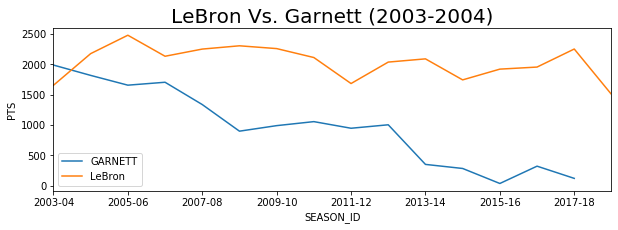

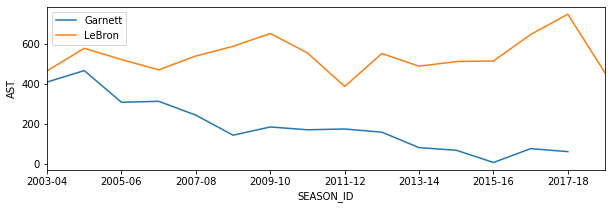

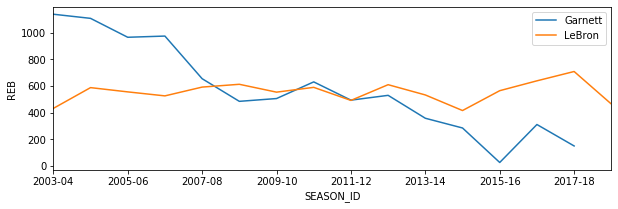

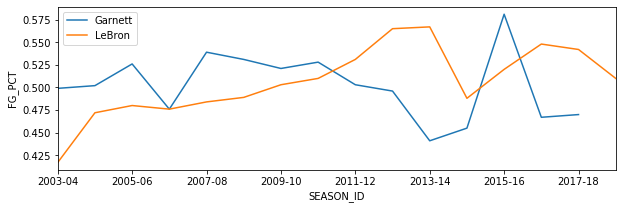

In [87]:
from pandas.plotting import scatter_matrix

ax = Garnettdf.plot(x='SEASON_ID', y='PTS')
p = LeBron.plot(ax=ax,x='SEASON_ID', y='PTS',figsize=(10, 3))
p.legend(["GARNETT", "LeBron"])
p.set(ylabel="PTS")
p.set_title("LeBron Vs. Garnett (MVP: 2003-2004)", fontsize=20)


ax = Garnettdf.plot(x='SEASON_ID', y='AST')
p = LeBron.plot(ax=ax,x='SEASON_ID', y='AST',figsize=(10, 3))
p.legend(["Garnett", "LeBron"])
p.set(ylabel="AST")

ax = Garnettdf.plot(x='SEASON_ID', y='REB')
p = LeBron.plot(ax=ax,x='SEASON_ID', y='REB', figsize=(10, 3))
p.legend(["Garnett", "LeBron"])
p.set(ylabel="REB")

ax = Garnettdf.plot(x='SEASON_ID', y='FG_PCT')
p = LeBron.plot(ax=ax,x='SEASON_ID', y='FG_PCT', figsize=(10, 3))
p.legend(["Garnett", "LeBron"])

p.set(ylabel="FG_PCT")

[Text(0, 0.5, 'FG_PCT')]

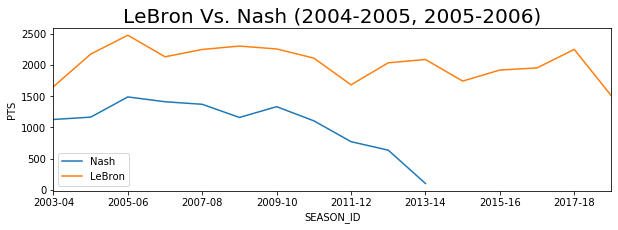

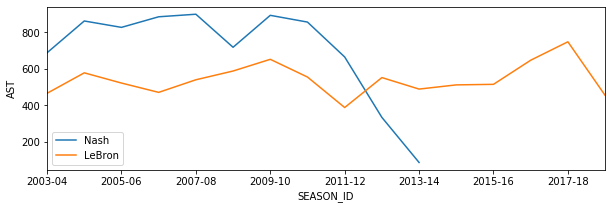

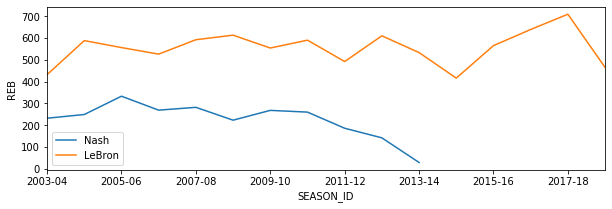

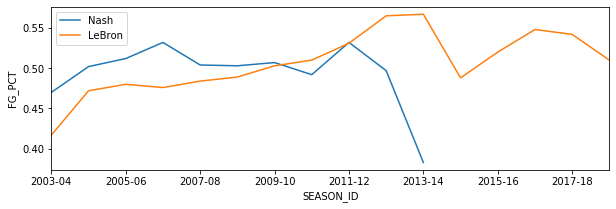

In [185]:
ax = Nashdf.plot(x='SEASON_ID', y='PTS')

p = LeBron.plot(ax=ax,x='SEASON_ID', y='PTS',figsize=(10,3))
p.legend(["Nash", "LeBron"])
p.set(ylabel="PTS")
p.set_title("LeBron Vs. Nash (2004-2005, 2005-2006)", fontsize=20)


ax = Nashdf.plot(x='SEASON_ID', y='AST')
p = LeBron.plot(ax=ax,x='SEASON_ID', y='AST',figsize=(10,3))
p.legend(["Nash", "LeBron"])
p.set(ylabel="AST")

ax = Nashdf.plot(x='SEASON_ID', y='REB')
p = LeBron.plot(ax=ax,x='SEASON_ID', y='REB', figsize=(10,3))
p.legend(["Nash", "LeBron"])
p.set(ylabel="REB")

ax = Nashdf.plot(x='SEASON_ID', y='FG_PCT')
p = LeBron.plot(ax=ax,x='SEASON_ID', y='FG_PCT', figsize=(10,3))
p.legend(["Nash", "LeBron"])
p.set(ylabel="FG_PCT")

The Below is a similar take on the graphs above alhough I have decided to change up the styling a bit! this style works particulary well for Lebron vs. Nowitzki as they both have the same years in the league

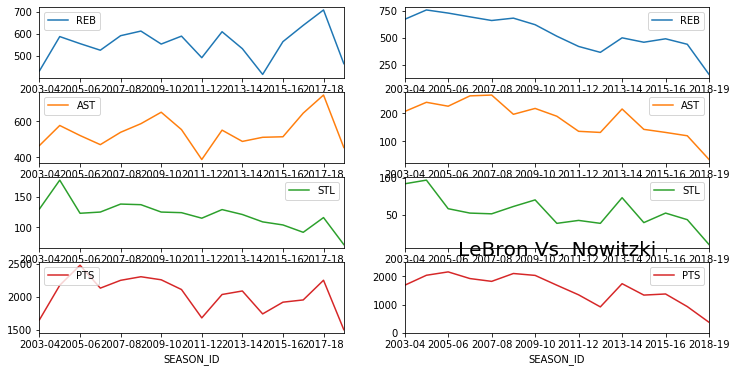

In [143]:

p.set_title("LeBron Vs. Nowitzki (2006-2007)", fontsize=20)

temp_leb = LeBron.drop(['FG_PCT', 'GP'],axis=1)
temp_dirk = Nowitzkidf.drop(['FG_PCT','GP'],axis=1)

fig, axes = plt.subplots(nrows=4,ncols=2,figsize=(12,6),)


temp_leb.plot(ax = axes[:,0],x='SEASON_ID',subplots=True) 

plt.title('LeBron Vs. Nowitzki', fontsize=20)
temp_dirk.plot(ax = axes[:,1],x='SEASON_ID', subplots=True)

plt.ylim((0,2500))

plt.show()

[Text(0, 0.5, 'FG_PCT')]

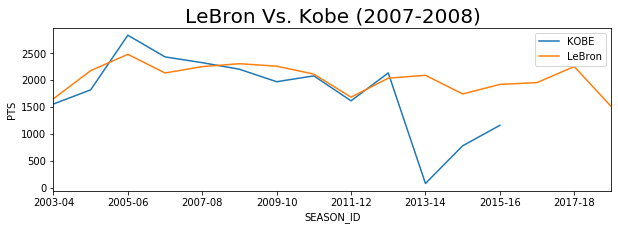

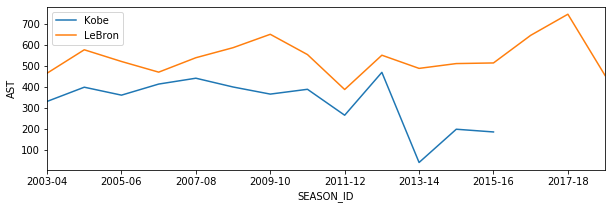

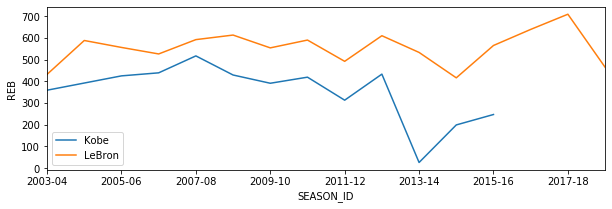

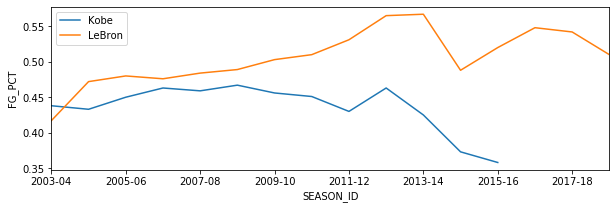

In [90]:
ax = Bryantdf.plot(x='SEASON_ID', y='PTS')
p = LeBron.plot(ax=ax,x='SEASON_ID', y='PTS',figsize=(10,3))
p.legend(["KOBE", "LeBron"])
p.set(ylabel="PTS")
p.set_title("LeBron Vs. Kobe (2007-2008)", fontsize=20)


ax = Bryantdf.plot(x='SEASON_ID', y='AST')
p = LeBron.plot(ax=ax,x='SEASON_ID', y='AST',figsize=(10,3))
p.legend(["Kobe", "LeBron"])
p.set(ylabel="AST")

ax = Bryantdf.plot(x='SEASON_ID', y='REB')
p = LeBron.plot(ax=ax,x='SEASON_ID', y='REB', figsize=(10,3))
p.legend(["Kobe", "LeBron"])
p.set(ylabel="REB")

ax = Bryantdf.plot(x='SEASON_ID', y='FG_PCT')
p = LeBron.plot(ax=ax,x='SEASON_ID', y='FG_PCT', figsize=(10,3))
p.legend(["Kobe", "LeBron"])
p.set(ylabel="FG_PCT")

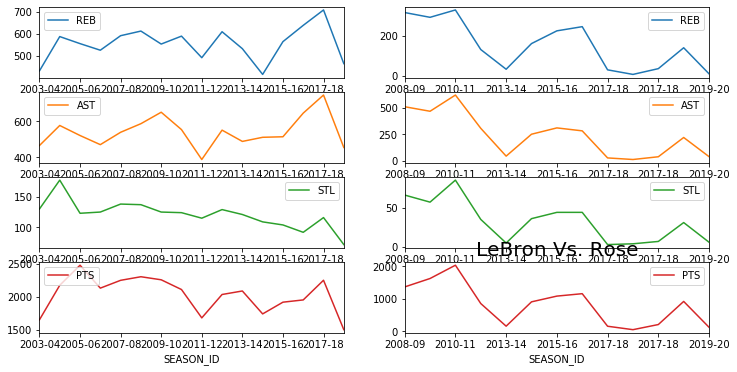

In [118]:
temp_leb = LeBron.drop(['FG_PCT', 'GP'],axis=1)
temp_rose = Rosedf.drop(['FG_PCT','GP'],axis=1)


fig, axes = plt.subplots(nrows=4,ncols=2,figsize=(12,6))
plt.title('LeBron Vs. Rose', fontsize=20)
# plot first pandas frame in subplot style
temp_leb.plot(ax = axes[:,0],x='SEASON_ID',subplots=True) 
# plot second pandas frame in subplot style
temp_rose.plot(ax = axes[:,1],x='SEASON_ID',subplots=True)



plt.show()


[Text(0, 0.5, 'FG_PCT')]

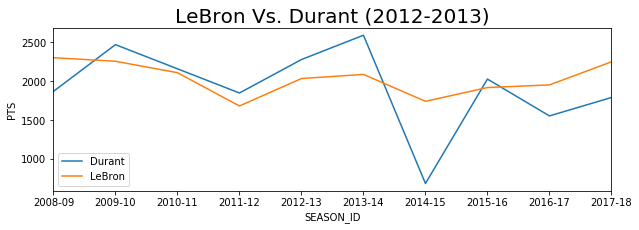

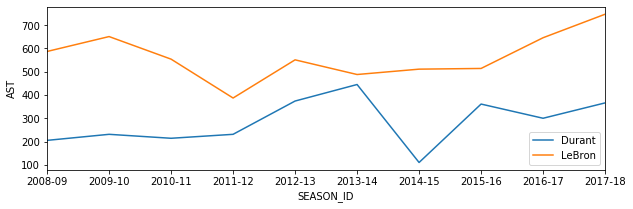

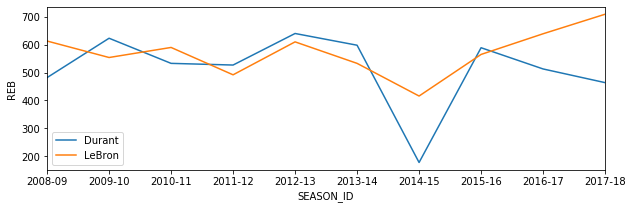

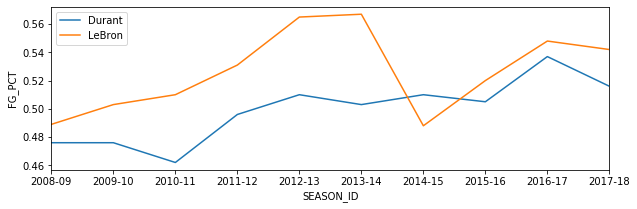

In [167]:
tempLBJ = LeBron.loc[LeBron['SEASON_ID'].isin(['2007-2008','2008-09','2009-10','2010-11','2011-12','2012-13','2013-14','2014-15','2015-16','2016-17','2017-18','2018-2019'])]
tempKD = Durantdf.loc[Durantdf['SEASON_ID'].isin(['2008-09','2009-10','2010-11','2011-12','2012-13','2013-14','2014-15','2015-16','2016-17','2017-18'])]

ax = tempKD.plot(x='SEASON_ID', y='PTS')
p = tempLBJ.plot(ax=ax,x='SEASON_ID', y='PTS',figsize=(10,3))
p.legend(["Durant", "LeBron"])
p.set(ylabel="PTS")
p.set_title("LeBron Vs. Durant (2012-2013)", fontsize=20)


ax = tempKD.plot(x='SEASON_ID', y='AST')
p = tempLBJ.plot(ax=ax,x='SEASON_ID', y='AST',figsize=(10,3))
p.legend(["Durant", "LeBron"])
p.set(ylabel="AST")

ax = tempKD.plot(x='SEASON_ID', y='REB')
p = tempLBJ.plot(ax=ax,x='SEASON_ID', y='REB', figsize=(10,3))
p.legend(["Durant", "LeBron"])
p.set(ylabel="REB")

ax = tempKD.plot(x='SEASON_ID', y='FG_PCT')
p = tempLBJ.plot(ax=ax,x='SEASON_ID', y='FG_PCT', figsize=(10,3))
p.legend(["Durant", "LeBron"])
p.set(ylabel="FG_PCT")

[Text(0, 0.5, 'FG_PCT')]

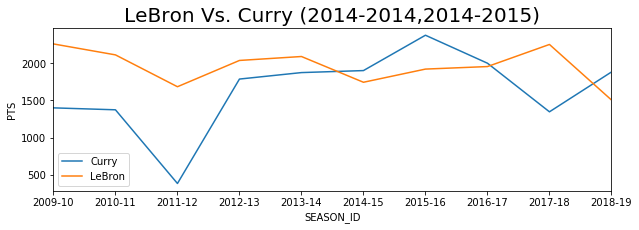

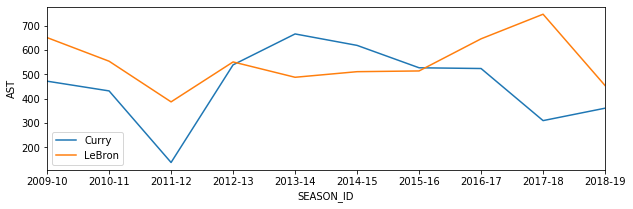

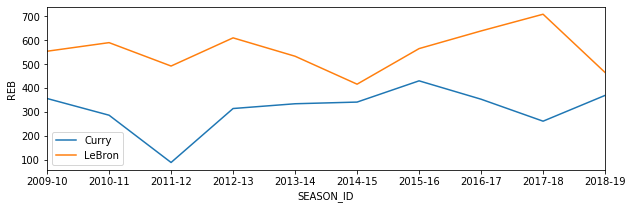

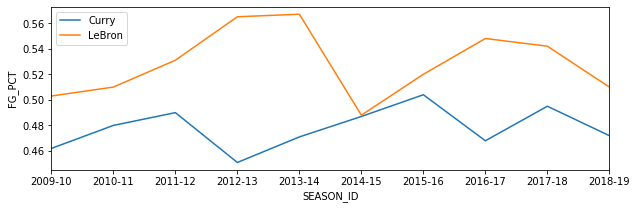

In [177]:
LBJ = LeBron.loc[LeBron['SEASON_ID'].isin(['2009-10','2010-11','2011-12','2012-13','2013-14','2014-15','2015-16','2016-17','2017-18','2018-19',])]
Curry =Currydf.loc[Currydf['SEASON_ID'].isin(['2009-10','2010-11','2011-12','2012-13','2013-14','2014-15','2015-16','2016-17','2017-18','2018-19'])]

ax = Curry.plot(x='SEASON_ID', y='PTS')
p = LBJ.plot(ax=ax,x='SEASON_ID', y='PTS',figsize=(10,3))
p.legend(["Curry", "LeBron"])
p.set(ylabel="PTS")
p.set_title("LeBron Vs. Curry (2014-2014,2014-2015)", fontsize=20)


ax = Curry.plot(x='SEASON_ID', y='AST')
p = LBJ.plot(ax=ax,x='SEASON_ID', y='AST',figsize=(10,3))
p.legend(["Curry", "LeBron"])
p.set(ylabel="AST")

ax = Curry.plot(x='SEASON_ID', y='REB')
p = LBJ.plot(ax=ax,x='SEASON_ID', y='REB', figsize=(10,3))
p.legend(["Curry", "LeBron"])
p.set(ylabel="REB")

ax = Curry.plot(x='SEASON_ID', y='FG_PCT')
p = LBJ.plot(ax=ax,x='SEASON_ID', y='FG_PCT', figsize=(10,3))
p.legend(["Curry", "LeBron"])
p.set(ylabel="FG_PCT")

[Text(0, 0.5, 'FG_PCT')]

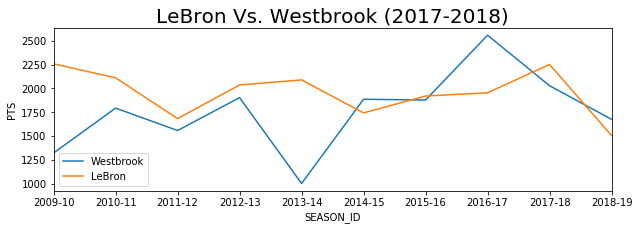

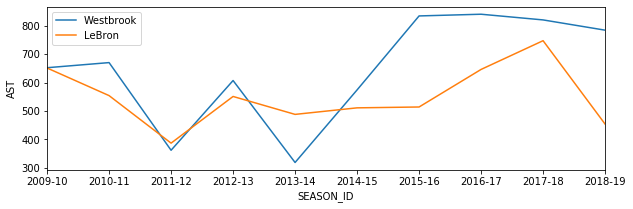

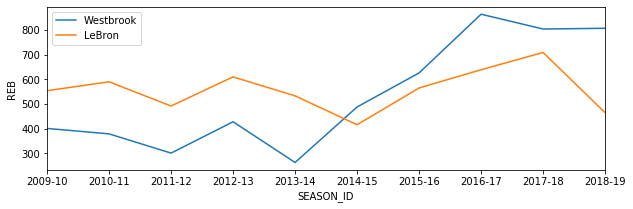

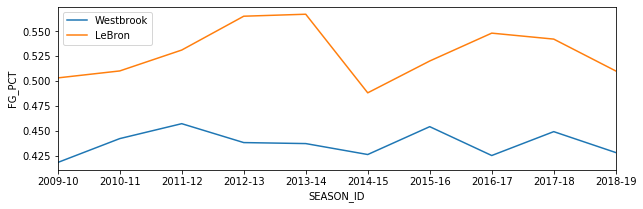

In [178]:

WB =Westbrookdf.loc[Westbrookdf['SEASON_ID'].isin(['2009-10','2010-11','2011-12','2012-13','2013-14','2014-15','2015-16','2016-17','2017-18','2018-19'])]

ax = WB.plot(x='SEASON_ID', y='PTS')
p = LBJ.plot(ax=ax,x='SEASON_ID', y='PTS',figsize=(10,3))
p.legend(["Westbrook", "LeBron"])
p.set(ylabel="PTS")
p.set_title("LeBron Vs. Westbrook (2017-2018)", fontsize=20)


ax = WB.plot(x='SEASON_ID', y='AST')
p = LBJ.plot(ax=ax,x='SEASON_ID', y='AST',figsize=(10,3))
p.legend(["Westbrook", "LeBron"])
p.set(ylabel="AST")

ax = WB.plot(x='SEASON_ID', y='REB')
p = LBJ.plot(ax=ax,x='SEASON_ID', y='REB', figsize=(10,3))
p.legend(["Westbrook", "LeBron"])
p.set(ylabel="REB")

ax = WB.plot(x='SEASON_ID', y='FG_PCT')
p = LBJ.plot(ax=ax,x='SEASON_ID', y='FG_PCT', figsize=(10,3))
p.legend(["Westbrook", "LeBron"])
p.set(ylabel="FG_PCT")

[Text(0, 0.5, 'FG_PCT')]

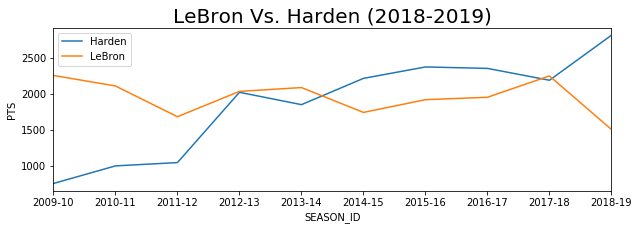

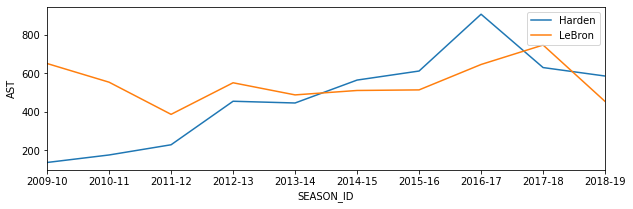

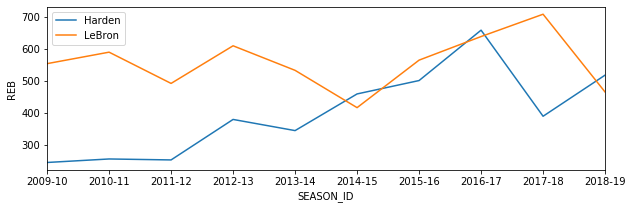

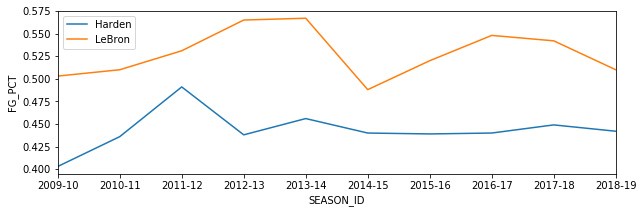

In [184]:
Harden = Hardendf.loc[Hardendf['SEASON_ID'].isin(['2009-10','2010-11','2011-12','2012-13','2013-14','2014-15','2015-16','2016-17','2017-18','2018-19'])]

ax = Harden.plot(x='SEASON_ID', y='PTS')
p = LBJ.plot(ax=ax,x='SEASON_ID', y='PTS',figsize=(10,3))
p.legend(["Harden", "LeBron"])
p.set(ylabel="PTS")
p.set_title("LeBron Vs. Harden (2018-2019)", fontsize=20)


ax = Harden.plot(x='SEASON_ID', y='AST')
p = LBJ.plot(ax=ax,x='SEASON_ID', y='AST',figsize=(10,3))
p.legend(["Harden", "LeBron"])
p.set(ylabel="AST")

ax = Harden.plot(x='SEASON_ID', y='REB')
p = LBJ.plot(ax=ax,x='SEASON_ID', y='REB', figsize=(10,3))
p.legend(["Harden", "LeBron"])
p.set(ylabel="REB")

ax = Harden.plot(x='SEASON_ID', y='FG_PCT')
p = LBJ.plot(ax=ax,x='SEASON_ID', y='FG_PCT', figsize=(10,3))
p.legend(["Harden", "LeBron"])
p.set(ylabel="FG_PCT")

For more than the vast majority of all of the above comparisons it can be seen that LeBron James stat's are nearly universally better than every other MVP, and quite often this is the case even in the other player's MVP winning year. It can certainly be said that there is a case for LeBron to have won the title in nearly all these years.<br>
It is obvious also that in the 2018-2019 season LeBron's stats dropped significantly, This is due mainly to the fact that LeBron missed 1/3 of the NBA season in this year through injury.<br>
It is also quite noticeable that every player suffered an apparent dip in performance in the 2011 season. The reason for this being the 'NBA Lockout' which took place that year which involved a much shorter season - it reduced the regular season from 82 to 66 games.

## Rise and fall of teams with LeBron:


Lets now take a look at some of the other data we collected, namely the performance of the different teams LeBron has been on throught the course of hos now 17 year career. We will look specifically at his first team, the Cleveland Cavaliers. The Cavs drafted LeBron when he was just 19, all the way back in 2003.

Text(0.5, 1.0, 'Cavs result from 2000-2003 (pre-LeBron)')

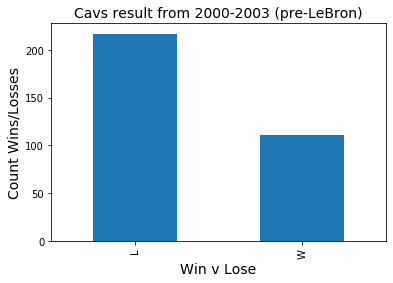

In [36]:
import pandas as pd

p=cavs0002['WL'].groupby([cavs0002['WL']]).count().plot(kind='bar')
p.set_xlabel("Win v Lose", fontsize=14)
p.set_ylabel("Count Wins/Losses", fontsize=14)
p.set_title("Cavs result from 2000-2003 (pre-LeBron)", fontsize=14)

Text(0.5, 1.0, 'Cavs result from 2003-2009 (LeBron-era)')

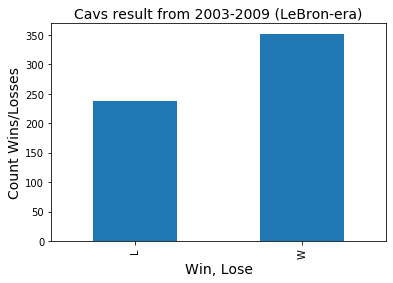

In [30]:
p=cavs0309['WL'].groupby([cavs0309['WL']]).count().plot(kind='bar')
p.set_xlabel("Win, Lose", fontsize=14)
p.set_ylabel("Count Wins/Losses", fontsize=14)
p.set_title("Cavs result from 2003-2009 (LeBron-era)", fontsize=14)

Text(0.5, 1.0, 'Cavs result from 2010-2013 (post-LeBron)')

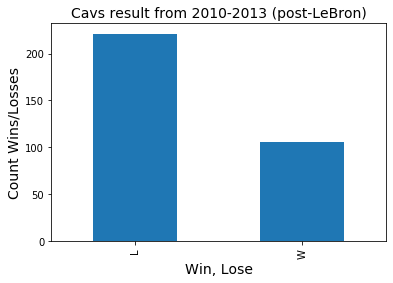

In [38]:
p=cavs1013['WL'].groupby([cavs1013['WL']]).count().plot(kind='bar')
p.set_xlabel("Win, Lose", fontsize=14)
p.set_ylabel("Count Wins/Losses", fontsize=14)
p.set_title("Cavs result from 2010-2013 (post-LeBron)", fontsize=14)

### Tentative Conclusion
This is a pretty incredible view on how one player can so aggressively dominate an entire league. It is rare to see an athletes career stay so dominant for so long, the comaprison of LeBron to the other MVPs is a testament to the longevity and ability. Further analysis could be done to compare LeBron directly to others who have done something similar, for example Michael Jordan, Wilt Chamberlain or Kareem Abdul Jabaar.
The impact LeBron has on the teams he plays for is also apparent, with the bar charts showing terrible performances in the periods before his arrival and after his departure, whilst the perios of him being on the team bears much more fruit.

Based on the current data it appears that there is a very strong indicator that LeBron should certainly be considered as being one of the best ever players to play the game.

It appears no matter how old LeBron gets, he doesn't seem to let it bother his performance!